In [1]:
import pandas as pd
import numpy as np
import cv2
import opencv
from IPython.display import display
import pickle
import matplotlib.patches as patches
from perceptual.filterbank import *
import ffmpeg
import cv2
import colorsys
import matplotlib.pyplot as plt
from cvtools import ipynb_show_cv2_image
from cvtools import ipynb_show_matrix

# determine what OpenCV version we are using
try:
    import cv2.cv as cv
    USE_CV2 = True
    print("yes")
except ImportError:
    # OpenCV 3.x does not have cv2.cv submodule
    USE_CV2 = False

In [4]:
df_camera = pd.read_csv("../dataset/new_CAMERA.csv",header = None)
df_camera = df_camera.loc[:, :31]
df_camera_1 = (df_camera == 1)*1

df_camera_1
df_camera_1['which_people'] = ''
column_names = df_camera_1.columns
for name in column_names:
    df_camera_1.loc[df_camera_1[name]==1,'which_people'] = df_camera_1.loc[df_camera_1[name]==1,'which_people'] + str(name) + ' '

df_camera_1 = df_camera_1['which_people'].str.split(' ',expand = True)
df_camera_1 = df_camera_1.astype(str).replace(['None',''],'')
lists = df_camera_1.values.tolist()
lists_fixed = []
for list_ in lists:
    lists_1 = list(filter(None, list_))
    lists_1 = list(map(int, lists_1))
    lists_1_array = np.array(lists_1) +1
    lists_1 = list(map(str, lists_1_array))
    lists_fixed.append(lists_1)
#     lists_fixed.append(list(filter(None, list_)))
    
# display(lists_fixed)
with open('ids_in_frame.pickle', 'wb') as file:
    pickle.dump(lists_fixed, file)




In [88]:
###test
# with open('ids_in_frame.pickle', 'rb') as file:
#     b = pickle.load(file)
# count = 0
# for i in b:
#     if 30000 <= count <= 30010:
#         print(i)
#         count += 1
#     else:
#         count+=1

        

['2', '8', '9', '10', '12', '13', '14', '15', '17', '18', '21', '23', '25', '28']
['2', '8', '9', '10', '12', '13', '14', '15', '17', '18', '21', '23', '25', '28']
['2', '8', '9', '10', '12', '13', '14', '15', '17', '18', '21', '23', '25', '28']
['2', '8', '9', '10', '12', '13', '14', '15', '17', '18', '21', '23', '25', '28']
['2', '8', '9', '10', '12', '13', '14', '15', '17', '18', '21', '23', '25', '28']
['2', '8', '9', '10', '12', '13', '14', '15', '17', '18', '21', '23', '25', '28']
['2', '8', '9', '10', '12', '13', '14', '15', '17', '18', '21', '23', '25', '28']
['2', '8', '9', '10', '12', '13', '14', '15', '17', '18', '21', '23', '25', '28']
['2', '8', '9', '10', '12', '13', '14', '15', '17', '18', '21', '23', '25', '28']
['2', '8', '9', '10', '12', '13', '14', '15', '17', '18', '21', '23', '25', '28']
['2', '8', '9', '10', '12', '13', '14', '15', '17', '18', '21', '23', '25', '28']


In [36]:
### Extract boudning boxes
df_1 = pd.read_csv("new_DATA.csv",header = None)
df_1 = df_1.iloc[:,0:224]

DATA_dict = {}
for person_id in range(1,33):
    df_temp = df_1.iloc[:,(person_id-1)*7:person_id*7]
    df_temp['start_point_x'] = df_temp.iloc[:,1].astype(float)
    df_temp['start_point_y'] = df_temp.iloc[:,2].astype(float)
    df_temp['width'] = df_temp.iloc[:,3].astype(float) - df_temp.iloc[:,1].astype(float)
    df_temp['height'] = df_temp.iloc[:,4].astype(float) - df_temp.iloc[:,2].astype(float)
    
#     DATA_dict[str(person_id)] = df_1.iloc[:,(person_id-1)*7:person_id*7]
    DATA_dict[str(person_id)] = df_temp

DATA_dict['1']
with open('bounding_boxes.pickle', 'wb') as file:
    pickle.dump(DATA_dict, file, protocol=pickle.HIGHEST_PROTOCOL)


/Users/poshin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/poshin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/poshin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

In [14]:
###test
# with open('bounding_boxes.pickle', 'rb') as file:
#     b = pickle.load(file)
# b['1'].loc[400:450,:]

,0,1,2,3,4,5,6,start_point_x,start_point_y,width,height
400,400,250,0,394,84,0,0,250.0,0.0,144.0,84.0
401,401,249,0,393,84,0,0,249.0,0.0,144.0,84.0
402,402,248,0,392,84,0,0,248.0,0.0,144.0,84.0
403,403,247,0,391,83,0,0,247.0,0.0,144.0,83.0
404,404,247,0,390,83,0,0,247.0,0.0,143.0,83.0
405,405,246,0,390,83,0,0,246.0,0.0,144.0,83.0
406,406,245,0,389,83,0,0,245.0,0.0,144.0,83.0
407,407,244,0,388,83,0,0,244.0,0.0,144.0,83.0
408,408,244,0,387,83,0,0,244.0,0.0,143.0,83.0
409,409,243,0,386,83,0,0,243.0,0.0,143.0,83.0


In [102]:
## find all people existed in the video (union)
with open('../dataset/ids_in_frame.pickle', 'rb') as file:
    ids_in_frame = pickle.load(file)

a = set([])
for list_ in ids_in_frame:
    a = a | set(list_)
a = list(map(int,list(a)))
a.sort()
a = list(map(str,list(a)))
print("people in the vidoe", a)


## find the first start time and end time of each person
# initialization
dict_list_startend = {}
frame = 0

for person in a:
    dict_list_startend[person] = {}
    dict_list_startend[person]['save_start'] = False
    dict_list_startend[person]['save_end'] = False
    dict_list_startend[person]['start_frame'] = frame
    dict_list_startend[person]['end_frame'] = frame

end_ = len(ids_in_frame)
for i in ids_in_frame:
    for person in a:
            
        if dict_list_startend[person]['save_start'] == False and (person in i):
            dict_list_startend[person]['start_frame'] = frame
            dict_list_startend[person]['save_start'] = True
            
        if dict_list_startend[person]['save_start']== True and dict_list_startend[person]['save_end']== False and (person not in i):
            dict_list_startend[person]['save_end']= True
            dict_list_startend[person]['end_frame'] = frame-1
            
        if frame == end_-1:
            if dict_list_startend[person]['save_end']== False:
                dict_list_startend[person]['end_frame'] = frame
            del dict_list_startend[person]['save_end']
            del dict_list_startend[person]['save_start']
            
            
    frame +=1 
dict_list_startend
with open('person_time.pickle', 'wb') as file:
    pickle.dump(dict_list_startend, file, protocol=pickle.HIGHEST_PROTOCOL)

In [103]:
with open('person_time.pickle', 'rb') as file:
    dict_list_startend_1 = pickle.load(file)
dict_list_startend_1

{'1': {'end_frame': 26399, 'start_frame': 24112},
 '10': {'end_frame': 35999, 'start_frame': 0},
 '12': {'end_frame': 35999, 'start_frame': 0},
 '13': {'end_frame': 12261, 'start_frame': 0},
 '14': {'end_frame': 35999, 'start_frame': 0},
 '15': {'end_frame': 10912, 'start_frame': 7344},
 '16': {'end_frame': 2399, 'start_frame': 0},
 '17': {'end_frame': 35999, 'start_frame': 0},
 '18': {'end_frame': 10835, 'start_frame': 3775},
 '19': {'end_frame': 15121, 'start_frame': 14400},
 '2': {'end_frame': 35999, 'start_frame': 0},
 '20': {'end_frame': 27691, 'start_frame': 22228},
 '21': {'end_frame': 11999, 'start_frame': 0},
 '22': {'end_frame': 2426, 'start_frame': 0},
 '23': {'end_frame': 11999, 'start_frame': 0},
 '25': {'end_frame': 35999, 'start_frame': 0},
 '26': {'end_frame': 21599, 'start_frame': 19200},
 '28': {'end_frame': 35999, 'start_frame': 3201},
 '30': {'end_frame': 19569, 'start_frame': 19413},
 '31': {'end_frame': 19199, 'start_frame': 0},
 '32': {'end_frame': 21599, 'start_

# Bounding box example

In [21]:
with open('bounding_boxes.pickle', 'rb') as file:
    bounding_boxes = pickle.load(file)
with open('ids_in_frame.pickle', 'rb') as file:
    ids_in_frame = pickle.load(file)

20.0
36015 20.0


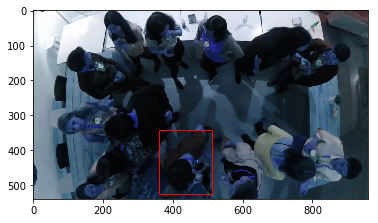

start_point_x    359.0
start_point_y    342.0
Name: 400, dtype: float64


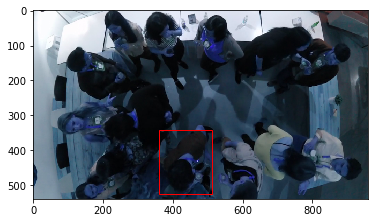

start_point_x    359.0
start_point_y    342.0
Name: 402, dtype: float64


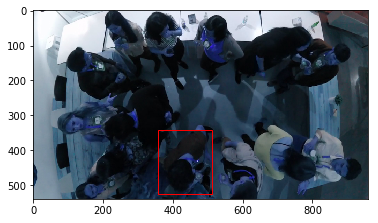

start_point_x    358.0
start_point_y    342.0
Name: 404, dtype: float64


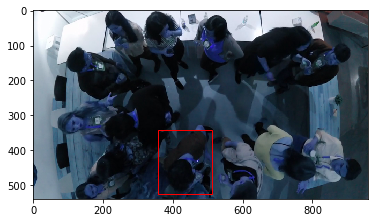

start_point_x    358.0
start_point_y    342.0
Name: 406, dtype: float64


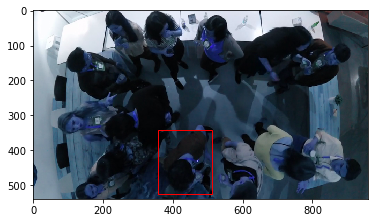

start_point_x    358.0
start_point_y    342.0
Name: 408, dtype: float64


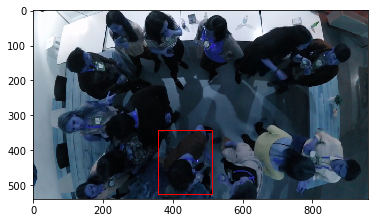

start_point_x    358.0
start_point_y    342.0
Name: 410, dtype: float64
done


In [20]:
# read video and process the img at the same time
# Simple dissimilarity is applied here image-image (pixel by pixel)

which_person = '21'
df_temp = bounding_boxes[which_person]
# display(df_temp)

vidFname = '../dataset/Segment_30min_Day1_CAM12_20fps_960x540.mp4'

vidReader = cv2.VideoCapture(vidFname)
vidReader.set(cv2.CAP_PROP_FPS,20)
fps = vidReader.get(cv2.CAP_PROP_FPS)
print(fps)
#20

vidFrames = int(vidReader.get(cv2.CAP_PROP_FRAME_COUNT))
print(vidFrames,fps)

success = True
stop = False
count = 0
while success:
    success,image = vidReader.read()
    if 400 <= count <= 410:
        img = np.array(image)
        plt.clf()
        fig,ax = plt.subplots(1)
        ax.imshow(img)
        ax.add_patch(patches.Rectangle((df_temp.loc[count,'start_point_x'],df_temp.loc[count,'start_point_y']), df_temp.loc[count,'width'], df_temp.loc[count,'height'],linewidth=1,edgecolor='r',facecolor='none'))
        plt.show()
        print(df_temp.loc[count,['start_point_x','start_point_y']])
        count += 1
    if count > 450:
        success = False        
    else:
        count += 1
print("done")

# Run tracking

In [ ]:
%run -i 'tracking6_ver2.py'